###Meskerem Goshime, Machine Learning, Decision Tree
###University of Texas at Austin - Post-Graduate Program in Artificial Intelligence and Machine Learning
####September 28, 2025

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/UTAIML_Projects/ML_Personal_Loan/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail(3)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
df.duplicated().sum()

np.int64(0)

####Observation/Sanity Check Summary:
#####- The data contains 5000 rows and 14 columns.
#####- All of the columns are numerical, which is what we need for a Linear Regression model.
#####- There are no missing values and there are no duplicated values.

## Exploratory Data Analysis.

####1. Mortgage Attribute: Distribution, patterns and outliers

In [ ]:
df['Mortgage'].describe()

,Mortgage
count,5000.000000
mean,56.498800
std,101.713802
min,0.000000
25%,0.000000
50%,0.000000
75%,101.000000
max,635.000000


<Axes: xlabel='Mortgage', ylabel='Count'>

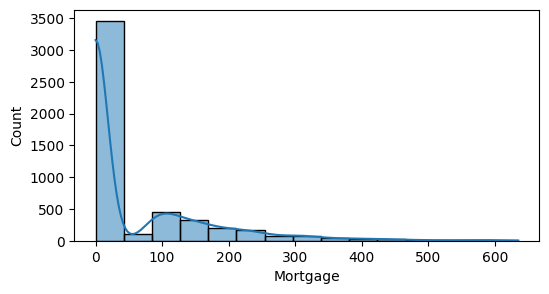

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(df['Mortgage'], bins=15, kde=True)

In [ ]:
x = df[df['Mortgage']==0]['ID'].shape[0]/df.shape[0]
print(f"Customers who don't have mortagage: {x:.0%}")

Customers who don't have mortagage: 69%


Mortagage Attribute Summary:
*   69% of the customers do not have mortgage.
*   The maximum mortagage amount is 635,000.
*   The mortgage column is highly right skwed

####2. Number of customers who have credit cards

In [ ]:
print(df['CreditCard'].value_counts())
print(df['CreditCard'].value_counts(normalize=True))

CreditCard
0    3530
1    1470
Name: count, dtype: int64
CreditCard
0    0.706
1    0.294
Name: proportion, dtype: float64


Credit Card Attribute Summary:
*   1470 customers (which is about 29% of the customers) have Credit Cards issued by other banks.
*   3530 (about 70%) customers do not have credit cards issued by other banks.

####3. Attributes that have strong correlation with the target attribute (personal loan)

In [ ]:
round(df.corr(), 3)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000,-0.008,-0.008,-0.018,0.002,-0.017,-0.025,0.021,-0.014,-0.025,-0.017,-0.007,-0.003,0.017
Age,-0.008,1.000,0.994,-0.055,-0.031,-0.046,-0.052,0.041,-0.013,-0.008,-0.000,0.008,0.014,0.008
Experience,-0.008,0.994,1.000,-0.047,-0.030,-0.053,-0.050,0.013,-0.011,-0.007,-0.001,0.010,0.014,0.009
Income,-0.018,-0.055,-0.047,1.000,-0.031,-0.158,0.646,-0.188,0.207,0.502,-0.003,0.170,0.014,-0.002
ZIPCode,0.002,-0.031,-0.030,-0.031,1.000,0.028,-0.012,-0.008,0.004,-0.003,0.002,0.022,0.028,0.024
Family,-0.017,-0.046,-0.053,-0.158,0.028,1.000,-0.109,0.065,-0.020,0.061,0.020,0.014,0.010,0.012
CCAvg,-0.025,-0.052,-0.050,0.646,-0.012,-0.109,1.000,-0.136,0.110,0.367,0.015,0.137,-0.004,-0.007
Education,0.021,0.041,0.013,-0.188,-0.008,0.065,-0.136,1.000,-0.033,0.137,-0.011,0.014,-0.015,-0.011
Mortgage,-0.014,-0.013,-0.011,0.207,0.004,-0.020,0.110,-0.033,1.000,0.142,-0.005,0.089,-0.006,-0.007
Personal_Loan,-0.025,-0.008,-0.007,0.502,-0.003,0.061,0.367,0.137,0.142,1.000,0.022,0.316,0.006,0.003


<Axes: >

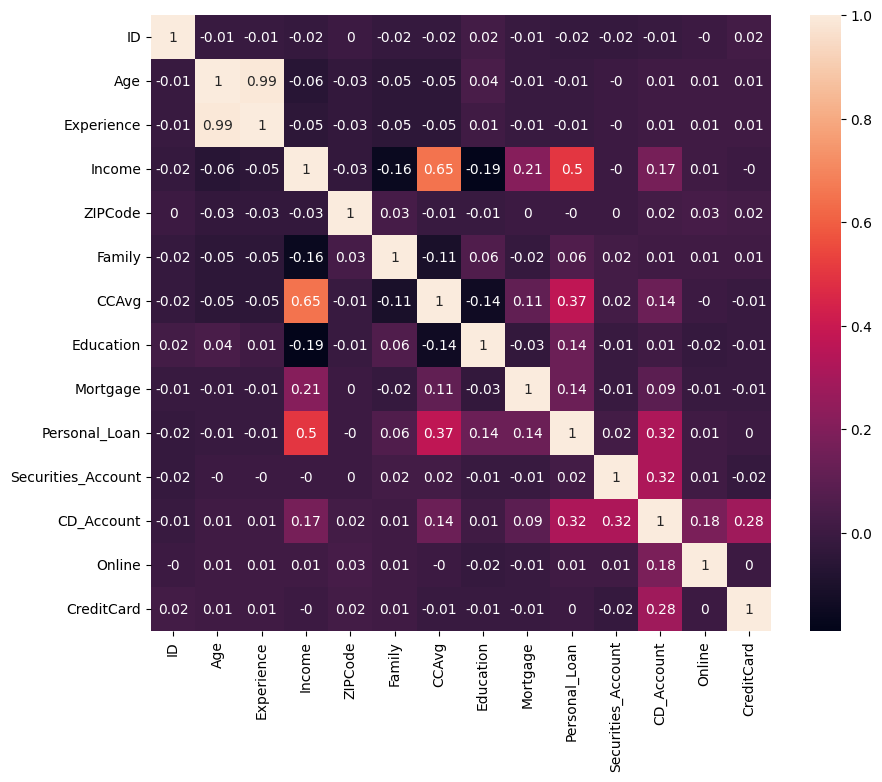

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(round(df.corr(), 2), annot=True)

Correlation with Target Variable:
Income, CCAvg and CD_Account are the top 3 attributes
respectively having the highest correlation with Personal_Loan.

####4. How does a customer's interest in purchasing a loan vary with their age?

In [ ]:
df.groupby('Personal_Loan')['Age'].mean()

,Age
Personal_Loan,
0,45.367257
1,45.066667


In [ ]:
df[['Age', 'Personal_Loan']].corr()

,Age,Personal_Loan
Age,1.000000,-0.007726
Personal_Loan,-0.007726,1.000000


<Axes: xlabel='Personal_Loan', ylabel='Age'>

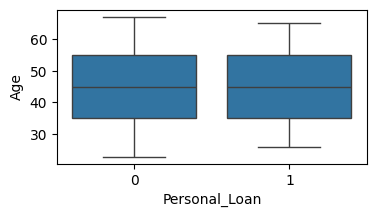

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(data=df, x='Personal_Loan', y='Age')

Age and Personal Loan Summary:
The Average age of those who took personal loan is slightly lower than those who did not take loan.
However, there is not a significant correlation between Age and Personal_Loan attributes.

####5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
df.groupby('Education')['Personal_Loan'].mean()

,Personal_Loan
Education,
1,0.044370
2,0.129722
3,0.136576


In [ ]:
df[['Education', 'Personal_Loan']].corr()

,Education,Personal_Loan
Education,1.000000,0.136722
Personal_Loan,0.136722,1.000000


Education and Personal Loan Summary:
There is a weak positive correlation (0.136722) between Personal Loan and Education. As educaton increases, the average personal loan amount increases.

## Data Preprocessing

1. Missing value treatment
2. Outlier detection and treatment (if needed)
3. Feature engineering (if needed)
4. Preparing data for modeling
5. Any other preprocessing steps (if needed)

####1. Missing value treatment

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


The data does not have any missing values, which is great!

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


####2. Outlier detection and Treatment

In [ ]:
df[df['Experience']<0].shape

(52, 14)


There are 52 negative values in the Experience column. Negative work experience does not make sense and I assume those are errors.
Everyone with negative experience happens to be younger, between 23-29 years old. I will replace all the negative values in the experience column with 0s.

In [ ]:
#Replacing all negative values in the Experience column with 0
df.loc[df['Experience'] < 0, 'Experience'] = 0


In [ ]:
df[df['Experience']<0].shape  #checking if there are any negative values in the experience column

(0, 14)

####3. Feature Engineering

In [ ]:
df['ZIPCode'].value_counts() #checking the values in the Zipcode column

,count
ZIPCode,
94720,169
94305,127
95616,116
90095,71
93106,57
...,...
94970,1
90068,1
90813,1


There are too many zipcodes to do one-hot-encoding

In [ ]:
#Taking the first 2 digits of ZIPCodes
df['ZIPCode'] = df['ZIPCode'].astype('str')   #converting to string in order to do string slicing
df['ZIPCode'] = df['ZIPCode'].str.slice(0,2) #taking the first 2 digits
df['ZIPCode'] = df['ZIPCode'].astype('int64') #converting back to int64
df['ZIPCode'].value_counts()

,count
ZIPCode,
94,1472
92,988
95,815
90,703
91,565
93,417
96,40


In [ ]:
df[['Personal_Loan', 'ZIPCode']].corr()

,Personal_Loan,ZIPCode
Personal_Loan,1.000000,-0.000607
ZIPCode,-0.000607,1.000000


In [ ]:
df.head()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1


In [ ]:
df_encoded = pd.get_dummies(df, columns=['ZIPCode'], drop_first=True)
df_encoded.head()


,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,True,False,False,False,False,False
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,False,False,False,False,False,False
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,False,False,False,True,False,False
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,False,False,False,True,False,False
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,True,False,False,False,False,False


####4. Preparing the Data for Modeling

In [ ]:
X = df_encoded.drop(['ID', 'Personal_Loan'], axis=1)
y = df_encoded['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)


## Model Building

####Defining functions

In [ ]:
#Performance score calculation funciton
def scores(y_pred_train, y_pred_test):
  accuracy_score_train = accuracy_score(y_train, y_pred_train)
  accuracy_score_test = accuracy_score(y_test, y_pred_test)
  f1_score_train = f1_score(y_train, y_pred_train)
  f1_score_test = f1_score(y_test, y_pred_test)
  recall_score_test = recall_score(y_test, y_pred_test)
  recall_score_train = recall_score(y_train, y_pred_train)
  precision_score_test = precision_score(y_test, y_pred_test)
  precision_score_train = precision_score(y_train, y_pred_train)

  scores = {'accuracy_score_train': accuracy_score_train, 'accuracy_score_test': accuracy_score_test, 'f1_score_train': f1_score_train, 'f1_score_test': f1_score_test, 'recall_score_train': recall_score_train, 'recall_score_test': recall_score_test, 'precision_score_train': precision_score_train, 'precision_score_test': precision_score_test}
  scores = pd.DataFrame(scores, index=['Decision Tree'])
  return scores

In [ ]:
#plot confusion matrix function

def plot_cm(y_train, y_pred_train):
  plt.figure(figsize=(2.5, 2))
  cm = confusion_matrix(y_train, y_pred_train)
  cm_percentage = np.round((cm.astype('float')/ cm.sum() * 100), decimals=2, out=None)

  sns.heatmap(cm_percentage, annot=True)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix in %")
  plt.show()

In [ ]:
# Tree ploting function
def plot_tree(dtree):
  out = tree.plot_tree(
    dtree,
    feature_names=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95',
       'ZIPCode_96'],  # list of feature names (columns) in the dataset
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

In [ ]:
#Tree printing function
def print_tree(dtree, X_train):
  print(tree.export_text(
  dtree,
    feature_names=X_train.columns.tolist(),  # list of feature names (columns) in the dataset
    show_weights=True
))

####Decision Tree with No Pruning - Fully grown decision tree with no hyperparameters set

In [ ]:
dtree1 = DecisionTreeClassifier(random_state=42)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_train1 = dtree1.predict(X_train)
y_pred_test1 = dtree1.predict(X_test)

In [ ]:
scores1 = scores(y_pred_train1, y_pred_test1)
scores1

,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,1.0,0.984,1.0,0.919192,1.0,0.947917,1.0,0.892157


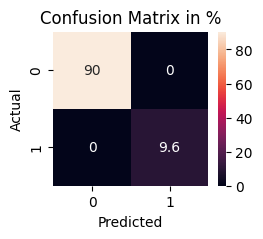

In [ ]:
#confusion matrix for training data
plot_cm(y_train, y_pred_train1)

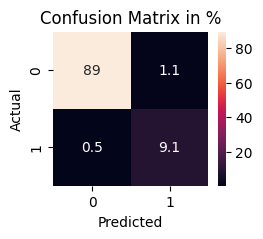

In [ ]:
#confusion matrix for test data
plot_cm(y_test, y_pred_test1)

In [ ]:
#Feature importance for dtree1
feature_importances1 = dtree1.feature_importances_
feature_names = X_train.columns.tolist()
importance_series = pd.Series(feature_importances1, index=feature_names)
# Sort the features by importance in descending order
sorted_importance1 = importance_series.sort_values(ascending=False)
sorted_importance1

,0
Income,0.408893
Education,0.302324
Family,0.143017
CCAvg,0.065598
Age,0.017000
CD_Account,0.016585
Mortgage,0.015525
Experience,0.011417
Online,0.009590
ZIPCode_93,0.005624


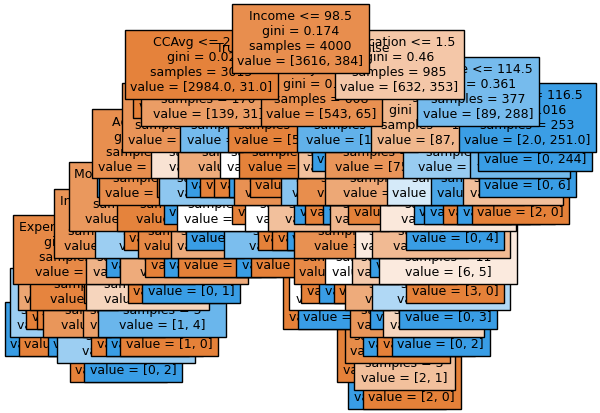

In [ ]:
plot_tree(dtree1)

In [ ]:
print_tree(dtree1, X_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- E

This tree is exteremely complex with each observation classified as its own node. The performance of this tree is perfect on the training set, but doesn't perform well in the test set. Therefore, it is an overfit tree.

## Model Performance Improvement

####2. Decision Tree Pre Pruning

#####Model Selection Critrea out of the Pre-Pruned Trees

Considerations for model Selection Critrea:
1. Least difference between training and test F1 score.
2. Best F1 Score on test data.
3. Best Recall score on the test data.

1. Finding the model with the least difference between the training f1 score and test f1 score.

In [ ]:
max_depths = [2, 4, 6, 8, 10]
max_leaf_nodes = [10, 20, 30, 40, 50]
min_sample_splits = [10, 20, 30, 40, 50]

In [ ]:
from math import inf
best_diff = inf

for max_depth in max_depths:
    for max_leaf_node in max_leaf_nodes:
        for min_sample_split in min_sample_splits:
          dtree = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_node, min_samples_split=min_sample_split, random_state=42)
          dtree.fit(X_train, y_train)

          y_pred_train = dtree.predict(X_train)
          y_pred_test = dtree.predict(X_test)

          f1_score_train = f1_score(y_train, y_pred_train)
          f1_score_test = f1_score(y_test, y_pred_test)

          if abs(f1_score_test - f1_score_train) < best_diff:
            best_diff = abs(f1_score_test - f1_score_train)
            best_params = {'max_depth': max_depth, 'max_leaf_nodes': max_leaf_node, 'min_sample_split': min_sample_split}
            best_scores = scores(y_pred_train, y_pred_test)

print(best_params)
best_scores



{'max_depth': 8, 'max_leaf_nodes': 30, 'min_sample_split': 20}


,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,0.98775,0.989,0.933151,0.942408,0.890625,0.9375,0.979943,0.947368


2. Finding the model with the highest test f1 score.

In [ ]:
best_test_f1 = 0

for max_depth in max_depths:
    for max_leaf_node in max_leaf_nodes:
        for min_sample_split in min_sample_splits:
          dtree = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_node, min_samples_split=min_sample_split, random_state=42)
          dtree.fit(X_train, y_train)

          y_pred_train = dtree.predict(X_train)
          y_pred_test = dtree.predict(X_test)

          f1_score_test = f1_score(y_test, y_pred_test)

          if f1_score_test > best_test_f1:
              best_test_f1 = f1_score_test
              best_params = {'max_depth': max_depth, 'max_leaf_nodes': max_leaf_node, 'min_sample_split': min_sample_split}
              best_scores = scores(y_pred_train, y_pred_test)

print(best_params)
best_scores

{'max_depth': 4, 'max_leaf_nodes': 10, 'min_sample_split': 10}


,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,0.98475,0.991,0.917679,0.953368,0.885417,0.958333,0.952381,0.948454


3. Finding Model with best recall score

In [ ]:
best_test_recall = 0

for max_depth in max_depths:
    for max_leaf_node in max_leaf_nodes:
        for min_sample_split in min_sample_splits:
          dtree = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_node, min_samples_split=min_sample_split, random_state=42)
          dtree.fit(X_train, y_train)

          y_pred_train = dtree.predict(X_train)
          y_pred_test = dtree.predict(X_test)

          recall_score_test = recall_score(y_test, y_pred_test)

          if recall_score_test > best_test_recall:
              best_test_recall = recall_score_test
              best_params = {'max_depth': max_depth, 'max_leaf_nodes': max_leaf_node, 'min_sample_split': min_sample_split}
              best_scores = scores(y_pred_train, y_pred_test)

print(best_params)
best_scores

{'max_depth': 4, 'max_leaf_nodes': 10, 'min_sample_split': 10}


,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,0.98475,0.991,0.917679,0.953368,0.885417,0.958333,0.952381,0.948454


####Model Selection Critrea Choice

In the end, I have chosen F1 score along with Recall Score on the test data as my model selection critrea. I wanted to make sure that the recall score is good along with the F1 score because I did not want to miss any potential customers who might positively respond to personal loan offer.

####Model Selection out of the Pre-Pruned Models

It just happens that the model with best test recall score is the same as the model with best test F1 score, max_depth of 4, max_leaf_nodes of 10 and mi_sample split of 10.

Out of the pre-pruned models, I choose this model that highest F1 score as well as highest Recall Score especially because I would like to identify all the customers who might potentially accept an offer for personal loan.

As a bonus, this decision tree is a small tree, yet with great preformance.

In [ ]:
# Building the model with highest F1 score and highest recall score

dtree2 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=10, random_state=42)
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred_test2 = dtree2.predict(X_test)
y_pred_train2 = dtree2.predict(X_train)

scores2 = scores(y_pred_train2, y_pred_test2)
scores2


,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,0.98475,0.991,0.917679,0.953368,0.885417,0.958333,0.952381,0.948454


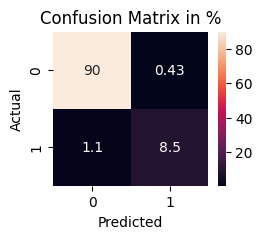

In [ ]:
plot_cm(y_train, y_pred_train2)

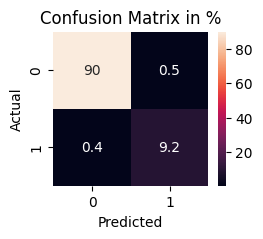

In [ ]:
plot_cm(y_test, y_pred_test2)

In [ ]:
#Feature importance of dtree2
feature_importances2 = dtree2.feature_importances_
feature_names = X_train.columns.tolist()
importance_series = pd.Series(feature_importances2, index=feature_names)
# Sort the features by importance in descending order
sorted_importance2 = importance_series.sort_values(ascending=False)
print(sorted_importance2)

Income                0.460538
Education             0.336086
Family                0.144192
CCAvg                 0.042962
CD_Account            0.016221
Age                   0.000000
Experience            0.000000
Mortgage              0.000000
Securities_Account    0.000000
Online                0.000000
CreditCard            0.000000
ZIPCode_91            0.000000
ZIPCode_92            0.000000
ZIPCode_93            0.000000
ZIPCode_94            0.000000
ZIPCode_95            0.000000
ZIPCode_96            0.000000
dtype: float64


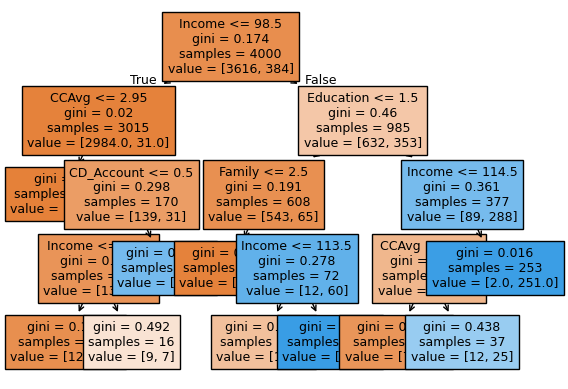

In [ ]:
plot_tree(dtree2)

In [ ]:
print_tree(dtree2, X_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [127.00, 14.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- weights: [9.00, 7.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--

This model heavily uses income, CCAvg, CD  Account. This makes sense since these are the variables with highest correlation to personal loan. It also uses Education which has some significance to the target variable.

###Post Pruning

In [ ]:
classifier = DecisionTreeClassifier(random_state=42)
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = abs(path.ccp_alphas)
impurities = path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000164,0.000493
2,0.000222,0.001381
3,0.000231,0.001843
4,0.000244,0.002330
5,0.000306,0.003249
6,0.000331,0.004241
7,0.000333,0.004575
8,0.000333,0.004908
9,0.000333,0.005241


In [ ]:
# Create decision tree classifiers with each ccp_alpha value
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    clf.fit(X_train, y_train)
    clfs.append(clf)

####Model Selection Critrea - from the Post-Pruned Models

I will be using highest F1 score on the test data as my model selection critrea.

In [ ]:
#Calculate f1 scores on the training set for each classifier

train_f1_scores = []  # Initialize an empty list to store F1 scores

for clf in clfs:
    pred_train = clf.predict(X_train)
    f1_train = f1_score(y_train, pred_train)
    train_f1_scores.append(f1_train)

train_f1_scores

[1.0,
 0.9986962190352021,
 0.996078431372549,
 0.9947643979057592,
 0.9934469200524246,
 0.9908015768725361,
 0.9882044560943644,
 0.9842931937172775,
 0.9842931937172775,
 0.9842931937172775,
 0.9804432855280313,
 0.9764397905759162,
 0.9750982961992136,
 0.9738903394255874,
 0.9725490196078431,
 0.9712793733681462,
 0.9642384105960264,
 0.9573333333333334,
 0.9559412550066756,
 0.9546666666666667,
 0.9518716577540107,
 0.9405405405405406,
 0.9405405405405406,
 0.9338624338624338,
 0.9315789473684211,
 0.9287598944591029,
 0.9241011984021305,
 0.9176788124156545,
 0.9065934065934066,
 0.9065934065934066,
 0.900804289544236,
 0.8772919605077574,
 0.8355342136854742,
 0.7568988173455979,
 0.0]

In [ ]:
#Calculate f1 scores on test data for each classifier
test_f1_scores = []

for clf in clfs:
    pred_test = clf.predict(X_test)
    f1_test = f1_score(y_test, pred_test)
    test_f1_scores.append(f1_test)
test_f1_scores

[0.9191919191919192,
 0.9238578680203046,
 0.9238578680203046,
 0.9238578680203046,
 0.9238578680203046,
 0.9238578680203046,
 0.9191919191919192,
 0.9191919191919192,
 0.9191919191919192,
 0.9191919191919192,
 0.914572864321608,
 0.914572864321608,
 0.914572864321608,
 0.914572864321608,
 0.914572864321608,
 0.914572864321608,
 0.914572864321608,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.9137055837563451,
 0.9183673469387755,
 0.9183673469387755,
 0.9246231155778895,
 0.9246231155778895,
 0.9292929292929293,
 0.9484536082474226,
 0.9533678756476683,
 0.9424083769633508,
 0.9424083769633508,
 0.91,
 0.8923076923076924,
 0.8088888888888889,
 0.746268656716418,
 0.0]

In [ ]:
#finding the index value of the model with the highest test f1 score
max_test_f1_index = test_f1_scores.index(max(test_f1_scores))
max_test_f1_index

27

In [ ]:
#Finding the highest test f1 score
test_f1_scores[max_test_f1_index]

0.9533678756476683

In [ ]:
#Assigning dtree3 as the model with the highest test f1 score
dtree3 = clfs[max_test_f1_index]
dtree3

DecisionTreeClassifier(ccp_alpha=np.float64(0.0008702884311333967),
                       random_state=42)

In [ ]:
scores3 = scores(dtree3.predict(X_train), dtree3.predict(X_test))
scores3

,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,0.98475,0.991,0.917679,0.953368,0.885417,0.958333,0.952381,0.948454


It appears, the pre-pruned dtree2 model and the post-pruned dtree3 model have the exact same performance scores.

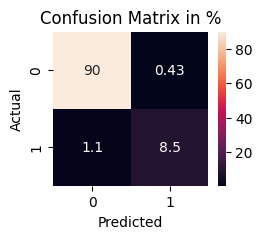

In [ ]:
y_pred_train3 = dtree3.predict(X_train)
plot_cm(y_train, y_pred_train3)

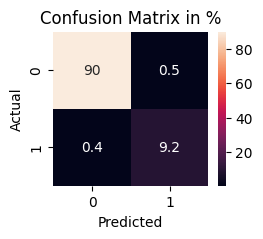

In [ ]:
y_pred_test3 = dtree3.predict(X_test)
plot_cm(y_test, y_pred_test3)

In [ ]:
#Feature importance for dtree3
feature_importances3 = dtree3.feature_importances_
feature_names = X_train.columns.tolist()
importance_series = pd.Series(feature_importances3, index=feature_names)
# Sort the features by importance in descending order
sorted_importance3 = importance_series.sort_values(ascending=False)
sorted_importance3



,0
Income,0.457555
Education,0.337945
Family,0.144989
CCAvg,0.043200
CD_Account,0.016311
Age,0.000000
Experience,0.000000
Mortgage,0.000000
Securities_Account,0.000000
Online,0.000000


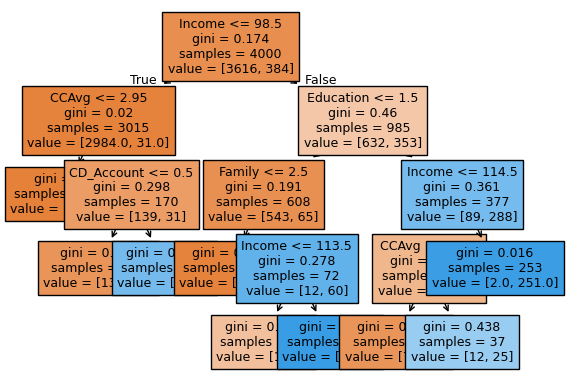

In [ ]:
plot_tree(dtree3)

In [ ]:
print_tree(dtree3, X_train)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 251.00] class: 1



## Model Performance Comparison and Final Model Selection

1. Training Set Confusion Matrix Comparison

confusion matrix for dtree1 - fully grown tree with no pruning


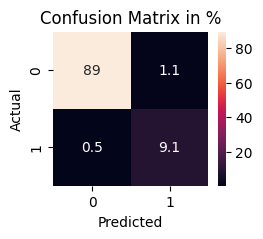

confusion matrix for dtree2 - pre-pruned


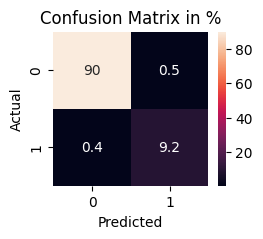

confusion matrix for dtree3 - post-pruned


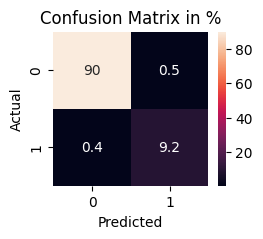

In [ ]:
print('confusion matrix for dtree1 - fully grown tree with no pruning')
plot_cm(y_test, y_pred_test1)
print('confusion matrix for dtree2 - pre-pruned')
plot_cm(y_test, y_pred_test2)
print('confusion matrix for dtree3 - post-pruned')
plot_cm(y_test, y_pred_test3)

The pre-pruned and post-pruned trees perform better on the test data than the fully grown tree with no pruning. The pre-pruned tree and post-pruned trees have very similar performance.

2. Performance Score Comparison

In [ ]:
scores1 #Fully grown tree with no pruning performance on training and test data

,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,1.0,0.984,1.0,0.919192,1.0,0.947917,1.0,0.892157


In [ ]:
scores2 #Pre-pruned tree scores performance on training and test data

,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,0.98475,0.991,0.917679,0.953368,0.885417,0.958333,0.952381,0.948454


In [ ]:
scores3 #Post-pruned tree scores performance on training and test data

,accuracy_score_train,accuracy_score_test,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
Decision Tree,0.98475,0.991,0.917679,0.953368,0.885417,0.958333,0.952381,0.948454


The fully grown tree has perfect performance on training data, but lower performance than the pruned trees on the test data. The pre-pruned and post-pruned trees have the exact same accuracy, f1, recall and precision on both training and test data.

3. Feature Importance comparison

In [ ]:
#Creating a dataframe containing feature importance of dtree2
sorted_importance = pd.DataFrame(sorted_importance1, columns=['dtree1'])

#Adding dtree2 feature importance to the dataframe
sorted_importance['dtree2'] = sorted_importance2

#Adding dtree3 feature importance to the dataframe
sorted_importance['dtree3'] = sorted_importance3
sorted_importance

,dtree1,dtree2,dtree3
Income,0.408893,0.460538,0.457555
Education,0.302324,0.336086,0.337945
Family,0.143017,0.144192,0.144989
CCAvg,0.065598,0.042962,0.043200
Age,0.017000,0.000000,0.000000
CD_Account,0.016585,0.016221,0.016311
Mortgage,0.015525,0.000000,0.000000
Experience,0.011417,0.000000,0.000000
Online,0.009590,0.000000,0.000000
ZIPCode_93,0.005624,0.000000,0.000000


The pre-pruned and post-pruned trees have very similar feature importance. The fully grown tree also has the features in the same order of importance, but the numbers it attributes to the features is slightly different than the pruned models.

## Actionable Insights and Business Recommendations


In [ ]:
# Adding a column in the dataframe with values of 0 or 1 that predicts whether a customer is likely to acquire a personal loan or not.
df['Personal_Loan_Candidate'] = dtree2.predict(X)
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan_Candidate,Personal_Loan_Proba
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0,0,0.000000
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0,0,0.000000
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0,0,0.000000
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0,0,0.137931
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1,0,0.000000


In [ ]:
df['Personal_Loan_Candidate'].value_counts()

,count
Personal_Loan_Candidate,
0,4546
1,454


In [ ]:
# Adding one more column that gives probability of customers acquiring personal loan.
df['Personal_Loan_Proba'] = dtree2.predict_proba(X)[:,1]
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan_Candidate,Personal_Loan_Proba
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0,0,0.000000
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0,0,0.000000
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0,0,0.000000
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0,0,0.137931
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1,0,0.000000


1. The pre-pruned model (dtree2) and the post-pruned (dtree3) models have very similar complexity and performance. They are both simple models, yet has very high performance on the training set. My model selection critrea was highest F1 score along with highest recall score. I wanted to ensure that I consider the recall score in order not to miss customers who might potentially acquire personal loan.

2. Although the pre-pruned and post-pruned models are very similar in terms of complexity and performance, I have decided to use the pre-pruned model (dtree2) because the parameters are a bit easier to understand for non-technical management and is less computationally expensive.

3. I added two columns to the dataset to help the marketing team identify their target market segment which is likely to accept their personal loan offer. One of the added columns has a 0 or 1 value, but the second one gives percentage value showing the probability of the customers to accept personal loan offer. Therefore, the marketing team can decide a percentage cutoff value higher or lower than 50%, if desired, to send out their marketing offers.

4. The model can be used to predict future customers whether they will be good fit for personal loan marketing offers or not. This might help automate sending out marketing offers saving time and effort for the marketing team.

5. This model has really high performance in predicting whether a customer is likely to acquire personal loan or not. However, I recommend retraining the model with updated data periodically to keep its performance high.

6. Insights from The Exploratory Data Analysis: Income, CCAvg, and CD_Account have the highest correlation with Personal Loan. All 3 variables have positive correlation with Personal Loan. This means Personal loan increases with higher Income, CCAvg and CD_Account values. In addition, Customers with higher education are more likely to take personal loan.

7. Feature importance done on the decision tree models show Income, Education, Family and CCAvg as the top most important columns.